# TimeGAN Tutorial

## Time-series Generative Adversarial Networks

- Paper: Jinsung Yoon, Daniel Jarrett, Mihaela van der Schaar, "Time-series Generative Adversarial Networks," Neural Information Processing Systems (NeurIPS), 2019.

- Paper link: https://papers.nips.cc/paper/8789-time-series-generative-adversarial-networks

- Last updated Date: April 24th 2020

- Code author: Jinsung Yoon (jsyoon0823@gmail.com)

This notebook describes the user-guide of a time-series synthetic data generation application using timeGAN framework. We use Stock, Energy, and Sine dataset as examples.

### Prerequisite
Clone https://github.com/jsyoon0823/timeGAN.git to the current directory.

## Necessary packages and functions call

- timegan: Synthetic time-series data generation module
- data_loading: 2 real datasets and 1 synthetic datasets loading and preprocessing
- metrics: 
    - discriminative_metrics: classify real data from synthetic data
    - predictive_metrics: train on synthetic, test on real
    - visualization: PCA and tSNE analyses

In [1]:
## Necessary packages
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# 1. TimeGAN model
from timegan import timegan, timegan_from_pretrained
# 2. Data loading
from data_loading import real_data_loading, sine_data_generation
# 3. Metrics
from metrics.discriminative_metrics import discriminative_score_metrics
from metrics.predictive_metrics import predictive_score_metrics
from metrics.visualization_metrics import visualization
# 4. Analysis
from utils import list_to_df

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

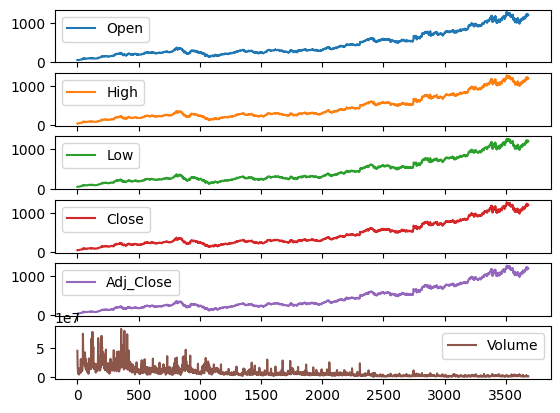

In [2]:
ori_df = pd.read_csv("data/stock_data.csv")
ori_df.plot(subplots=(1,5))

## Data Loading

Load original dataset and preprocess the loaded data.

- data_name: stock, energy, or sine
- seq_len: sequence length of the time-series data

In [5]:
## Data loading
data_name = 'sine'
seq_len = 24

if data_name in ['stock', 'energy', 'sensor']:
  ori_data = real_data_loading(data_name, seq_len)
elif data_name == 'sine':
  # Set number of samples and its dimensions
  no, dim = 10000, 5
  ori_data = sine_data_generation(no, seq_len, dim)
    
print(data_name + ' dataset is ready.')
print(len(ori_data[0]))
print(f'First row: {ori_data[0][0]}')

sine dataset is ready.
24
First row: [0.51834019 0.53694774 0.51025634 0.54143039 0.51537377]


[[0.5183401881233269, 0.551250608236635, 0.5839379093701447, 0.6162597877047951, 0.6480755302858074, 0.679246627615042, 0.709637376650631, 0.7391154715887327, 0.7675525798554462, 0.7948249008013123, 0.8208137046661281, 0.8454058494677008, 0.8684942735642671, 0.8899784617462162, 0.9097648828279901, 0.9277673968351078, 0.9439076300136322, 0.9581153160294769, 0.9703286018721461, 0.980494317131162, 0.9885682054728816, 0.9945151173099774, 0.9983091628247927, 0.9999338246803884], [0.5369477433331777, 0.5415619450350772, 0.5461725852263991, 0.5507792688138966, 0.5553816010433706, 0.559979187533497, 0.5645716343096218, 0.5691585478375213, 0.573739535057125, 0.5783142034161975, 0.5828821609039765, 0.5874430160847652, 0.5919963781314753, 0.5965418568591172, 0.6010790627582355, 0.6056076070282873, 0.6101271016109584, 0.6146371592234172, 0.6191373933915014, 0.6236274184828356, 0.6281068497398768, 0.6325753033128847, 0.6370323962928148, 0.64147774674413], [0.5102563362692693, 0.5518276668862142, 0.

<AxesSubplot:>

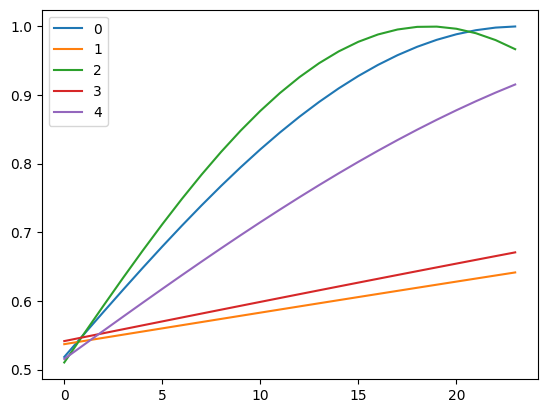

In [11]:
# ori_post_df = list_to_df(ori_data)
# ori_post_df[:1000].plot(subplots=True, layout=(3,3), figsize=(16,16))

# print(ori_data[0])

new_shape = [[],[],[],[],[]]
for l in ori_data[0]:
    for i in range(len(new_shape)):
        new_shape[i].append(l[i])
print(new_shape)
tmp_df = pd.DataFrame(ori_data[0])
tmp_df.plot()

## Set network parameters

TimeGAN network parameters should be optimized for different datasets.

- module: gru, lstm, or lstmLN
- hidden_dim: hidden dimensions
- num_layer: number of layers
- iteration: number of training iterations
- batch_size: the number of samples in each batch

In [6]:
## Newtork parameters
parameters = dict()

parameters['module'] = 'gru' 
parameters['hidden_dim'] = 24
parameters['num_layer'] = 3
parameters['iterations'] = 10000
parameters['batch_size'] = 128

## Run TimeGAN for synthetic time-series data generation

TimeGAN uses the original data and network parameters to return the generated synthetic data.

In [5]:
# Run TimeGAN
generated_data = timegan(ori_data, parameters, reproduce=False)   
print('Finish Synthetic Data Generation')





Instructions for updating:
This class is equivalent as tf.keras.layers.GRUCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons


2024-03-10 10:45:02.222505: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-03-10 10:45:02.223750: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2024-03-10 10:45:02.224685: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-UUR1SDU): /proc/driver/nvidia/version does not exist
2024-03-10 10:45:02.227905: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-03-10 10:45:02.256741: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2295630000 Hz
2024-03-10 10:45:02.260248: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5644f4ca5220 initialized for platform Host (this does not guarantee 

Start Embedding Network Training
step: 0/10000, e_loss: 0.3214
step: 1000/10000, e_loss: 0.027
step: 2000/10000, e_loss: 0.018
step: 3000/10000, e_loss: 0.0127
step: 4000/10000, e_loss: 0.0108
step: 5000/10000, e_loss: 0.0103
step: 6000/10000, e_loss: 0.0088
step: 7000/10000, e_loss: 0.0065
step: 8000/10000, e_loss: 0.0056
step: 9000/10000, e_loss: 0.0088
Finish Embedding Network Training
Start Training with Supervised Loss Only
step: 0/10000, s_loss: 0.2446
step: 1000/10000, s_loss: 0.0253
step: 2000/10000, s_loss: 0.0196
step: 3000/10000, s_loss: 0.0201
step: 4000/10000, s_loss: 0.0193
step: 5000/10000, s_loss: 0.0213
step: 6000/10000, s_loss: 0.0193
step: 7000/10000, s_loss: 0.0209
step: 8000/10000, s_loss: 0.0192
step: 9000/10000, s_loss: 0.0189
Finish Training with Supervised Loss Only
Start Joint Training
step: 0/10000, d_loss: 2.0592, g_loss_u: 0.67, g_loss_s: 0.0286, g_loss_v: 0.2756, e_loss_t0: 0.0554
step: 1000/10000, d_loss: 1.1407, g_loss_u: 1.8381, g_loss_s: 0.0269, g_loss

## Evaluate the generated data

### 1. Discriminative score

To evaluate the classification accuracy between original and synthetic data using post-hoc RNN network. The output is |classification accuracy - 0.5|.

- metric_iteration: the number of iterations for metric computation.

In [9]:
metric_iteration = 5

discriminative_score = list()
for _ in range(metric_iteration):
  temp_disc = discriminative_score_metrics(ori_data, generated_data)
  discriminative_score.append(temp_disc)

print('Discriminative score: ' + str(np.round(np.mean(discriminative_score), 4)))

Instructions for updating:
Please use tf.global_variables instead.
Discriminative score: 0.2675


## Evaluate the generated data

### 2. Predictive score

To evaluate the prediction performance on train on synthetic, test on real setting. More specifically, we use Post-hoc RNN architecture to predict one-step ahead and report the performance in terms of MAE.

In [10]:
predictive_score = list()
for tt in range(metric_iteration):
  temp_pred = predictive_score_metrics(ori_data, generated_data)
  predictive_score.append(temp_pred)   
    
print('Predictive score: ' + str(np.round(np.mean(predictive_score), 4)))


Predictive score: 0.0459


## Evaluate the generated data

### 3. Visualization

We visualize the original and synthetic data distributions using PCA and tSNE analysis.

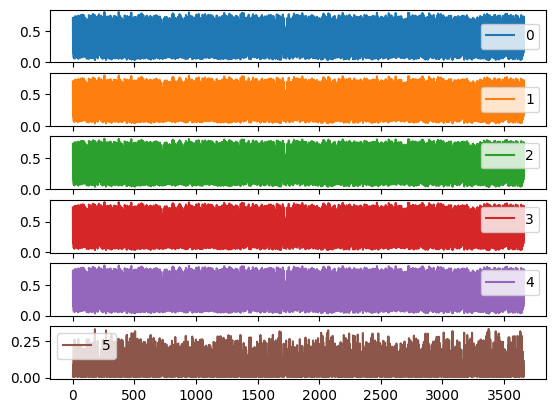

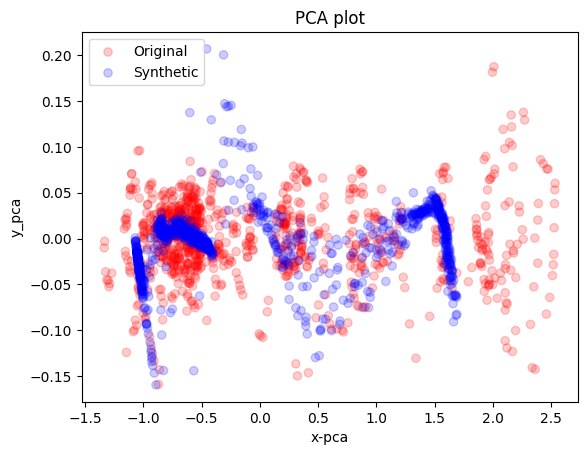

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.001s...
[t-SNE] Computed neighbors for 2000 samples in 0.238s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.023390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.250526
[t-SNE] KL divergence after 300 iterations: 0.625483


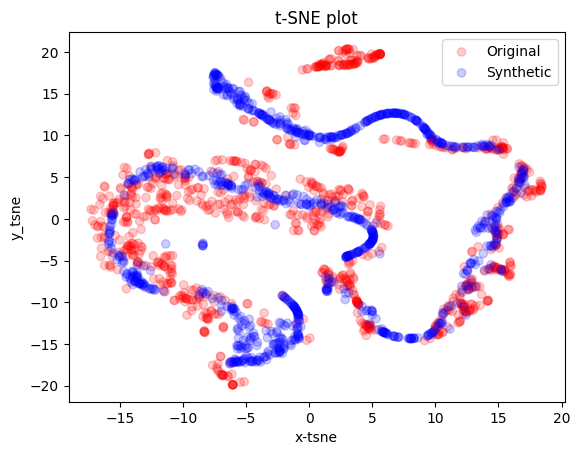

In [7]:
gen_df = list_to_df(generated_data)
gen_df[:200].plot(subplots=True, layout=(5,1))
visualization(ori_data, generated_data, 'pca')
visualization(ori_data, generated_data, 'tsne')

In [5]:
# generated_df = list_to_df(generated_data)
print(np.shape(gen_data))
print(np.shape(ori_data))

gen_data_indexless = []

for frame in gen_data:
    new_frame = []
    for sample in frame:
        new_frame.append(sample[1:])
    gen_data_indexless.append(new_frame)
print(np.shape(gen_data_indexless))


(28752, 24, 10)
(28776, 24, 9)
(28752, 24, 9)


In [11]:
import datetime
# Save generated data to csv
x = datetime.datetime.now()

timestamp = x.strftime("%d_%m_%y__%Hh%M")
generated_df = list_to_df(generated_data)
filepath = f'generated_data/gen_data_norm{timestamp}'
generated_df.to_csv(f'{filepath}.csv')
generated_df.to_csv(f'{filepath}_indexless.csv', index=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

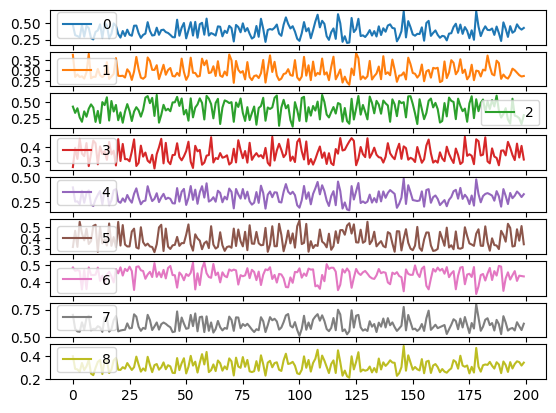

In [3]:
# gen_data_df = list_to_df(generated_data)
gen_data_df = pd.read_csv("generated_data/gen_sensor_norm12_03_24__11h59_indexless.csv")
gen_data_df[:200].plot(subplots=(3,2), )

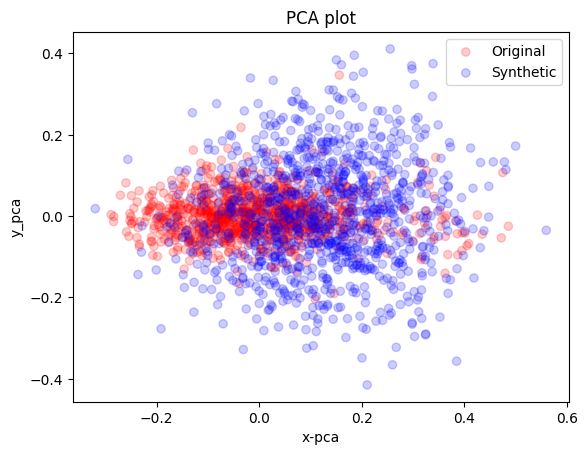

In [4]:
# gen_data = pd.read_csv('generated_data/gen_data.csv', index_col=0)
gen_data = real_data_loading('generated', seq_len)
visualization(ori_data, gen_data, 'pca')

In [4]:
model_to_load = "trained_models/model1.meta"
generated_data_pretrained = timegan_from_pretrained(model_to_load, ori_data, parameters, reproduce=False)

2024-02-22 15:58:45.422041: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-02-22 15:58:45.422169: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: UNKNOWN ERROR (303)
2024-02-22 15:58:45.422369: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-UUR1SDU): /proc/driver/nvidia/version does not exist
2024-02-22 15:58:45.424463: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2024-02-22 15:58:45.443949: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2295615000 Hz
2024-02-22 15:58:45.447506: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x564826cbc350 initialized for platform Host (this does not guarantee 

INFO:tensorflow:Restoring parameters from trained_models/./model1



In [7]:
# print(type(generated_data_pretrained))
generated_data_pretrained_df = list_to_df(generated_data_pretrained)
generated_data_pretrained_df.head()
# visualization(ori_data, generated_data_pretrained, 'tsne')

,0,1,2,3,4,5,6,7,8
0,0.509697,0.420850,0.133429,0.452260,0.427615,0.540926,0.514743,0.576055,0.424334
1,0.328661,0.236221,0.506223,0.315019,0.246654,0.355813,0.409049,0.662765,0.261230
2,0.265932,0.334933,0.289217,0.338264,0.247815,0.397174,0.536729,0.519875,0.291381
3,0.238120,0.252233,0.458607,0.297214,0.202674,0.333685,0.459484,0.587719,0.235201
4,0.226916,0.250464,0.467582,0.298439,0.195205,0.334611,0.461568,0.582940,0.229195
